# Liesel-GAM Demo Notebook

## Setup and Imports

In [24]:
import jax.numpy as jnp
import liesel.goose as gs
import liesel.model as lsl
import tensorflow_probability.substrates.jax.distributions as tfd

import liesel_gam as gam

In [25]:
# import data from R
from ryp import r, to_py

r("library(mgcv)")
r("data(columb)")
r("data(columb.polys)")

columb = to_py("columb", format="pandas").reset_index()
polys = to_py("columb.polys", format="numpy")

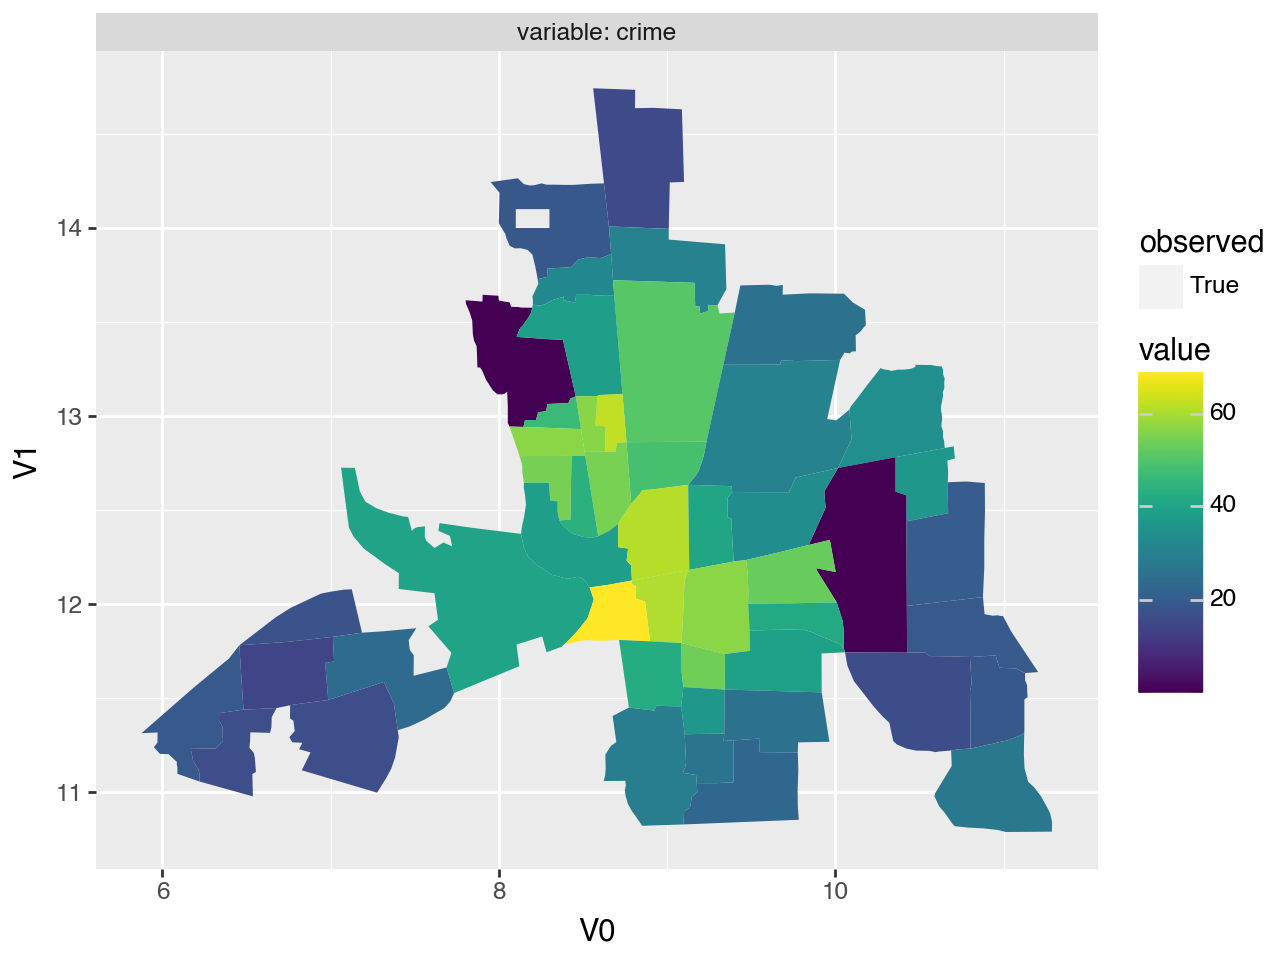

In [26]:
gam.plot_polys(region="district", which=["crime"], df=columb, polys=polys)

## Model Definition

### Setup response model

In [27]:
df = columb

loc = gam.AdditivePredictor("$\\mu$")
scale = gam.AdditivePredictor("$\\sigma$", inv_link=jnp.exp)


y = lsl.Var.new_obs(
    value=df.crime.to_numpy(),
    distribution=lsl.Dist(tfd.Normal, loc=loc, scale=scale),
    name="y",
)

tb = gam.TermBuilder.from_df(df)
loc += tb.mrf("district", polys=polys)

### Build and plot model

liesel.model.model - INFO - Converted dtype of Value(name="y_value").value


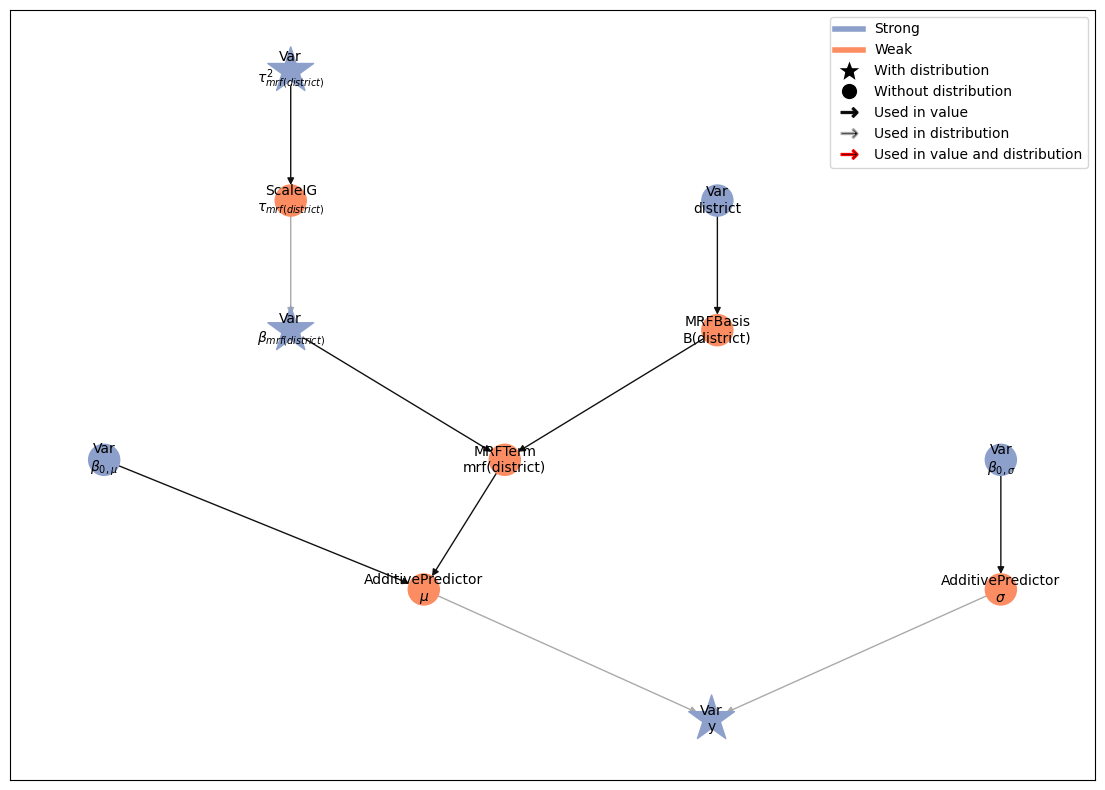

In [28]:
model = lsl.Model([y])
model.plot_vars()

## Run MCMC

In [29]:
eb = gs.LieselMCMC(model).get_engine_builder(seed=1, num_chains=4)

eb.set_epochs(
    gs.stan_epochs(
        warmup_duration=1000,
        posterior_duration=10000,
        init_duration=400,
        term_duration=400,
        thinning_posterior=10,
    )
)
engine = eb.build()
engine.sample_all_epochs()
results = engine.get_results()

liesel.goose.builder - WARNING - No jitter functions provided for position keys '$\\beta_{0,\\sigma}$', '$\\beta_{0,\\mu}$', '$\\beta_{mrf(district)}$', '$\\tau^2_{mrf(district)}$'. The initial values for these keys won't be jittered
liesel.goose.engine - INFO - Initializing kernels...
liesel.goose.engine - INFO - Done
liesel.goose.engine - INFO - Starting epoch: FAST_ADAPTATION, 400 transitions, 25 jitted together
100%|████████████████████████████████████████| 16/16 [00:03<00:00,  4.67chunk/s]
liesel.goose.engine - INFO - Finished epoch
liesel.goose.engine - INFO - Starting epoch: SLOW_ADAPTATION, 25 transitions, 25 jitted together
100%|█████████████████████████████████████████| 1/1 [00:00<00:00, 659.59chunk/s]
liesel.goose.engine - INFO - Finished epoch
liesel.goose.engine - INFO - Starting epoch: SLOW_ADAPTATION, 50 transitions, 25 jitted together
100%|████████████████████████████████████████| 2/2 [00:00<00:00, 1108.72chunk/s]
liesel.goose.engine - INFO - Finished epoch
liesel.goose

### MCMC summary

In [30]:
summary = gs.Summary(results)
summary

Parameter summary:

                                   kernel       mean        sd     q_0.05  \
parameter                index                                              
$\beta_{0,\mu}$          ()     kernel_01  35.097530  2.464325  31.014751   
$\beta_{0,\sigma}$       ()     kernel_00   2.825341  0.103683   2.657296   
$\beta_{mrf(district)}$  (0,)   kernel_02  -0.004783  0.169121  -0.201495   
                         (1,)   kernel_02   0.003330  0.177680  -0.206905   
                         (2,)   kernel_02   0.005598  0.157734  -0.195303   
                         (3,)   kernel_02   0.002610  0.160384  -0.207655   
                         (4,)   kernel_02   0.002381  0.164117  -0.206451   
                         (5,)   kernel_02  -0.002167  0.170567  -0.201088   
                         (6,)   kernel_02  -0.013608  0.172824  -0.238377   
                         (7,)   kernel_02   0.001001  0.151417  -0.200948   
                         (8,)   kernel_02   0.000325  0.160017  -0.198739   
                         (9,)   kernel_02   0.002301  0.172192  -0.207757   
                         (10,)  kernel_02   0.005537  0.166218  -0.197657   
                         (11,)  kernel_02  -0.000584  0.175126  -0.199629   
                         (12,)  kernel_02   0.001557  0.153929  -0.202396   
                         (13,)  kernel_02  -0.000339  0.157391  -0.204935   
                         (14,)  kernel_02  -0.001038  0.173391  -0.212613   
                         (15,)  kernel_02  -0.004224  0.178532  -0.215119   
                         (16,)  kernel_02   0.000729  0.164502  -0.203894   
                         (17,)  kernel_02   0.005171  0.157026  -0.193968   
                         (18,)  kernel_02   0.000306  0.158455  -0.211416   
                         (19,)  kernel_02  -0.004425  0.164043  -0.205279   
                         (20,)  kernel_02   0.000636  0.164702  -0.211430   
                         (21,)  kernel_02   0.004847  0.182140  -0.189541   
                         (22,)  kernel_02   0.001990  0.162799  -0.205388   
                         (23,)  kernel_02  -0.000790  0.155528  -0.203360   
                         (24,)  kernel_02  -0.002056  0.155754  -0.204907   
                         (25,)  kernel_02   0.001125  0.159588  -0.204718   
                         (26,)  kernel_02   0.003858  0.176103  -0.204278   
                         (27,)  kernel_02  -0.001467  0.173901  -0.208846   
                         (28,)  kernel_02  -0.003073  0.153725  -0.202580   
                         (29,)  kernel_02  -0.003736  0.163714  -0.210569   
                         (30,)  kernel_02  -0.002055  0.160427  -0.206065   
                         (31,)  kernel_02  -0.003850  0.155377  -0.217816   
                         (32,)  kernel_02  -0.005247  0.167221  -0.219766   
                         (33,)  kernel_02  -0.000336  0.163637  -0.198557   
                         (34,)  kernel_02  -0.003502  0.157904  -0.200258   
                         (35,)  kernel_02   0.003453  0.153226  -0.196521   
                         (36,)  kernel_02   0.002078  0.155602  -0.195470   
                         (37,)  kernel_02  -0.002780  0.167789  -0.219689   
                         (38,)  kernel_02   0.002795  0.154202  -0.197651   
                         (39,)  kernel_02   0.001728  0.168709  -0.200976   
                         (40,)  kernel_02  -0.010692  0.165785  -0.216546   
                         (41,)  kernel_02   0.008226  0.183639  -0.197643   
                         (42,)  kernel_02  -0.009132  0.159351  -0.220021   
                         (43,)  kernel_02   0.006336  0.160200  -0.197496   
                         (44,)  kernel_02  -0.022851  0.181621  -0.249587   
                         (45,)  kernel_02  -0.031820  0.207991  -0.271013   
                         (46,)  kernel_02  -0.009371  0.165001  -0.213605   
                         (47,)  kernel_02   0.050984 

## Plots

In [31]:
samples = results.get_posterior_samples()

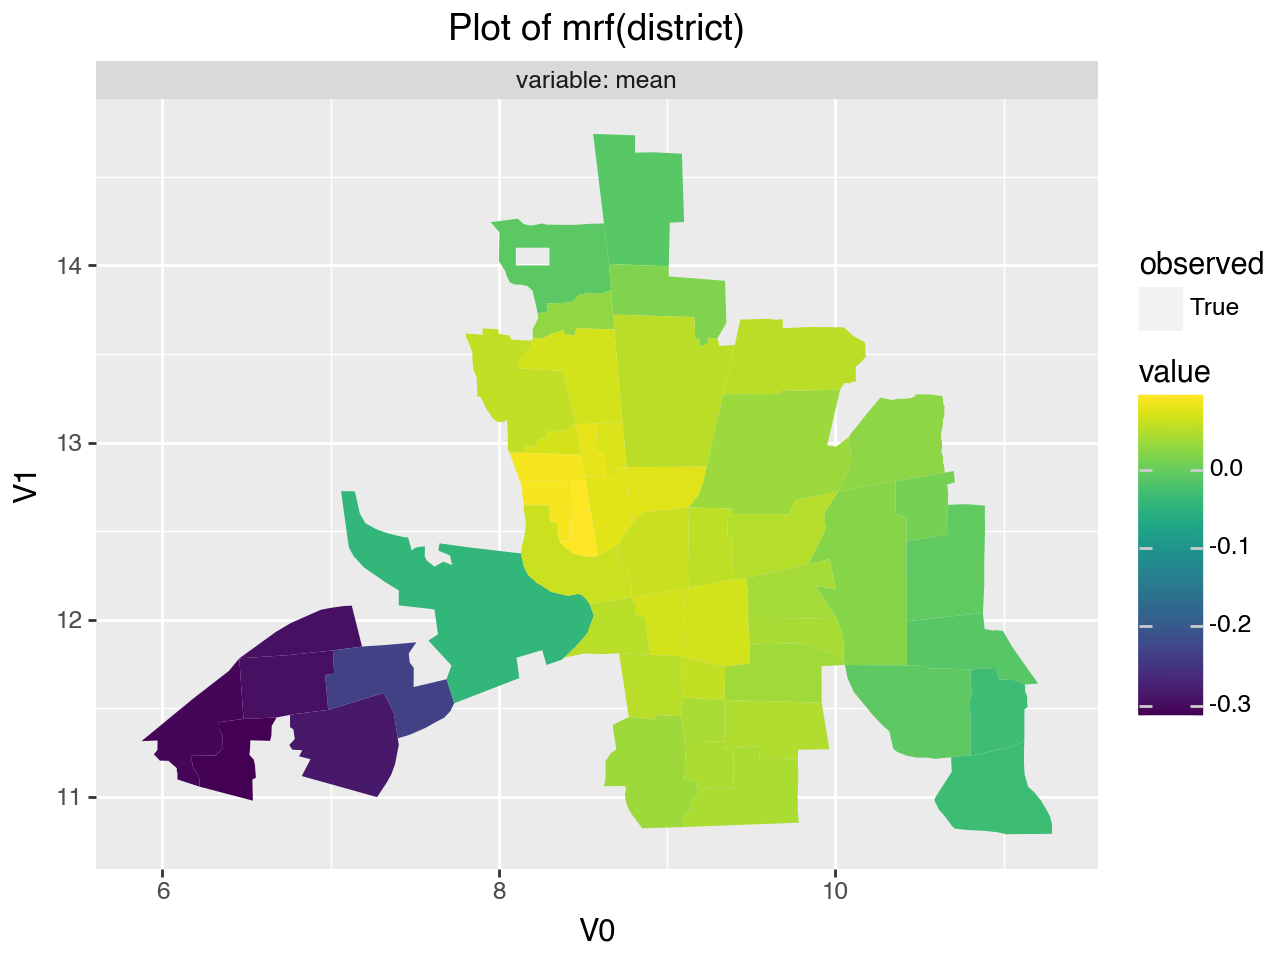

In [32]:
gam.plot_regions(
    term=loc.terms["mrf(district)"],
    samples=samples,
    # polys=polys, # since the term was created with polygons, no need to supply them
)

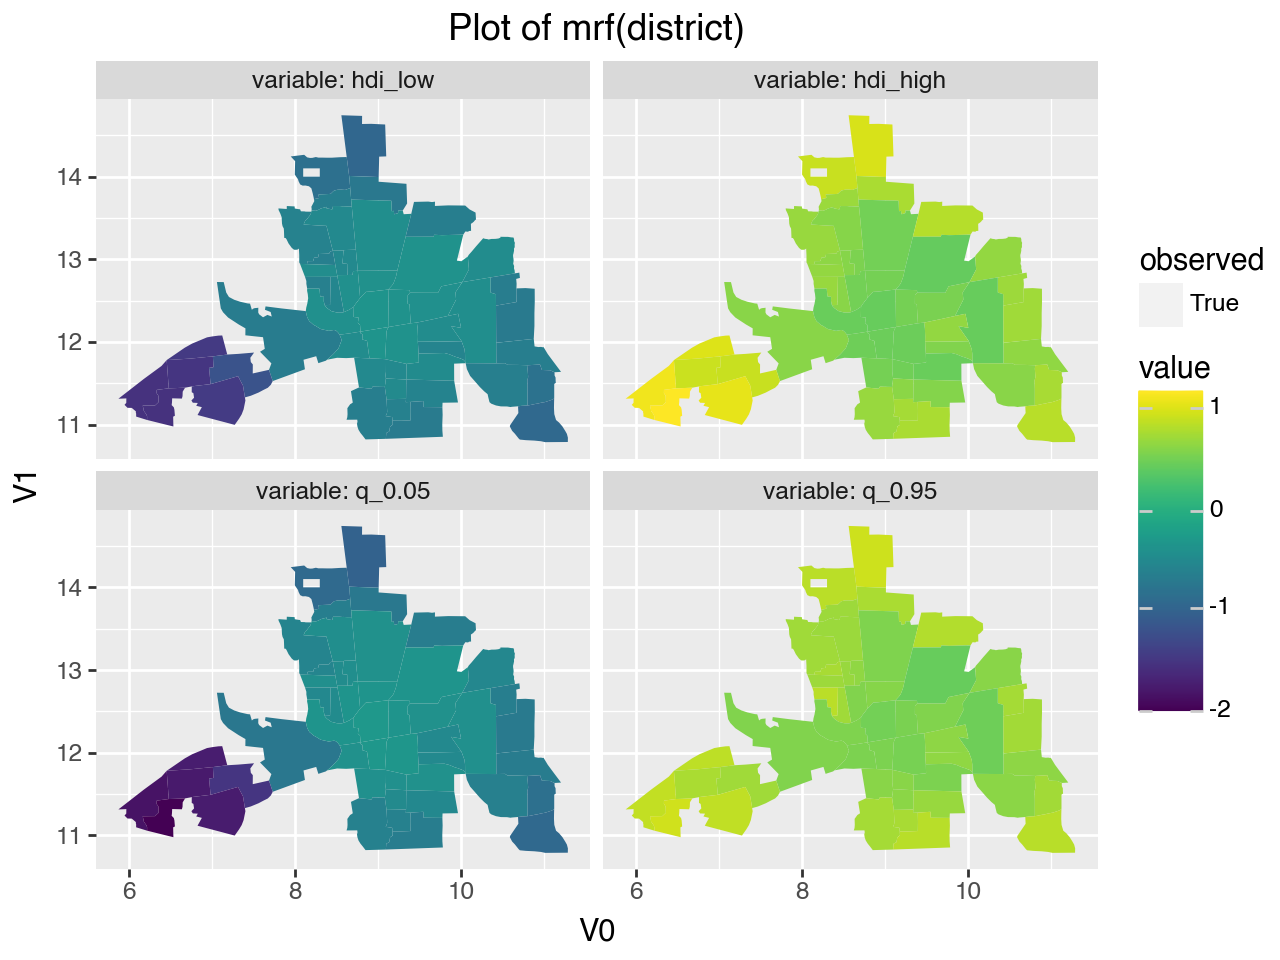

In [33]:
gam.plot_regions(
    term=loc.terms["mrf(district)"],
    samples=samples,
    # polys=polys, # since the term was created with polygons, no need to supply them
    which=["hdi_low", "hdi_high", "q_0.05", "q_0.95"],
)

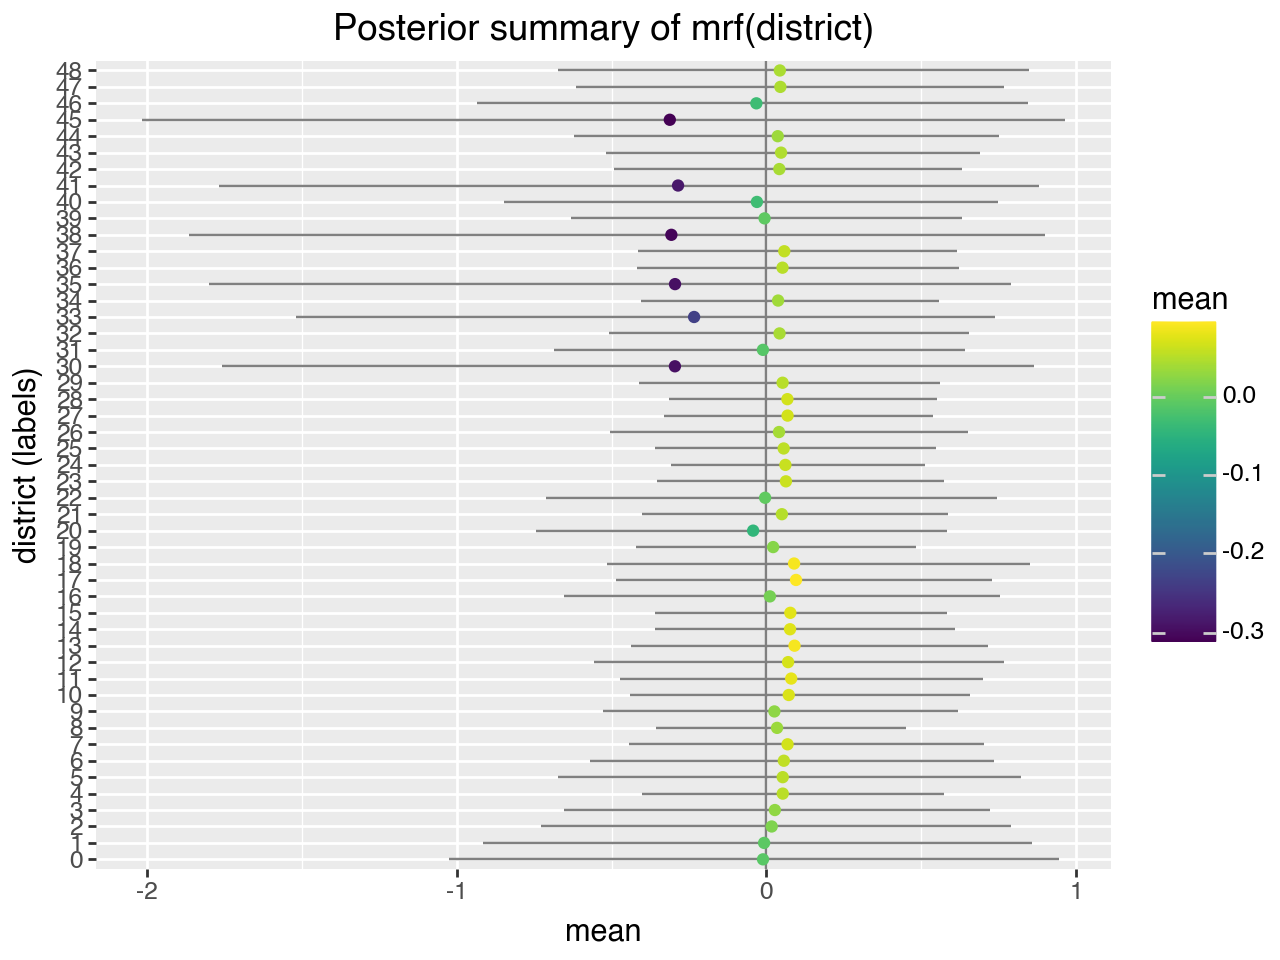

In [34]:
import plotnine as p9

gam.plot_forest(
    term=loc.terms["mrf(district)"],
    samples=samples,
    # labels=tb.bases.mappings["district"],
    ymin="q_0.05",
    ymax="q_0.95",
) + p9.aes(color="mean")